<a href="https://colab.research.google.com/github/adenadit/My-Data-Science-Site/blob/main/Numpy/Basic/2_Computation_on_NumPy_Arrays_Universal_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Slowness of loops**

In [1]:
import numpy as np
np.random.seed(0)

In [ ]:
def compute_reciprocals(values):
  output = np.empty(len(values))
  for i in range(len(values)):
    output[i] = 1.0/values[i]
    return output



In [ ]:
values = np.random.randint(1,10,size = 5)
compute_reciprocals(values)

array([0.16666667, 1.        , 1.        , 1.        , 1.        ])

In [ ]:
big_array = np.random.randint(1, 100, size = 1000000)
%timeit compute_reciprocals(big_array)

3.04 µs ± 68.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# **Introducing UFuncs**

In [ ]:
%timeit (1.0 / big_array)

2.02 ms ± 196 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [ ]:
e = np.arange(9).reshape((3, 3))
print(2**e)

[[  1   2   4]
 [  8  16  32]
 [ 64 128 256]]


# **Exploring NumPy’s UFuncs**

> **Array arithmetic**

In [ ]:
import numpy as np

In [ ]:
x = np.arange(4)

In [ ]:
print("x = ",x)
print("x + 5 =", x + 5)
print("x - 5 =",x - 5)
print("x * 2 =",x * 2)
print("x / 2 =",x / 2)
print("x // 2=",x // 2)

x =  [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2= [0 0 1 1]


In [ ]:
print(" -x =",-x)
print(" x**2=",x**2)
print("x % 2=",x%2)

 -x = [ 0 -1 -2 -3]
 x**2= [0 1 4 9]
x % 2= [0 1 0 1]


In [ ]:
-(0.5*x + 1)**2

array([-1.  , -2.25, -4.  , -6.25])

In [ ]:
# atau kita bisa juga menggunakan perintah
np.add(x, 2)

array([2, 3, 4, 5])

> arithmatic operation

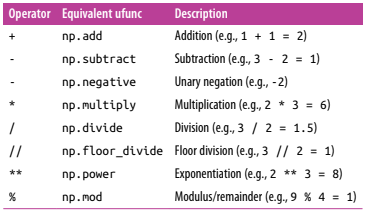

> **Absolute Value**

In [ ]:
y = np.array([-2, -1, 0, 1, 2])

In [ ]:
#menjalankan perintah python biasa
abs(y)

array([2, 1, 0, 1, 2])

In [ ]:
#perintah absolute dengan numpy
np.absolute(y)

array([2, 1, 0, 1, 2])

In [ ]:
#bisa juga dengan
np.abs(y)

array([2, 1, 0, 1, 2])

In [ ]:
# kemudian untuk mengubah bilangan kompleks ke absolute dapat dengan menggunakan perintah ini
z = np.array([3-4j, 4-3j, 2+0j, 0+1j])
print(np.abs(z))

[5. 5. 2. 1.]


> **Trigonometric Function**

In [ ]:
theta = np.linspace(0,np.pi,3)

In [ ]:
print("theta : ",theta)
print("sin(theta) :)",np.sin(theta))
print("cos(theta) :",np.cos(theta))
print("tan(theta) :",np.tan(theta))

theta :  [0.         1.57079633 3.14159265]
sin(theta) :) [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) : [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) : [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [ ]:
a = [-1, 0, 1]
print("a =",a)
print("arcsin(a) =",np.arcsin(a))
print("arccos(a) =",np.arccos(a))
print("arctan(a) =",np.arctan(a))

a = [-1, 0, 1]
arcsin(a) = [-1.57079633  0.          1.57079633]
arccos(a) = [3.14159265 1.57079633 0.        ]
arctan(a) = [-0.78539816  0.          0.78539816]


> **Exponent and logarithms**

In [ ]:
# Exponent
b = [1, 2, 3]

In [ ]:
print("b =",b)
print("e^b =",np.exp(b))
print("2^b =",np.exp2(b))
print("3^b =",np.power(3, b))

b = [1, 2, 3]
e^b = [ 2.71828183  7.3890561  20.08553692]
2^b = [2. 4. 8.]
3^b = [ 3  9 27]


In [ ]:
# Logarithms
c = [1, 2, 4, 10]

In [ ]:
print("c =",c)
print("ln(c) =",np.log(c))
print("log2(c) = ",np.log2(c))
print("log10(c) =",np.log10(c))

c = [1, 2, 4, 10]
ln(c) = [0.         0.69314718 1.38629436 2.30258509]
log2(c) =  [0.         1.         2.         3.32192809]
log10(c) = [0.         0.30103    0.60205999 1.        ]


In [ ]:
# adapun shortcut menjalankan perintah sederhana lain
d = [0, 0.001, 0.01, 0.1]

print("exp(d) - 1 =",np.expm1(d))
print("log(1+d) =",np.log1p(d))

exp(d) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1+d) = [0.         0.0009995  0.00995033 0.09531018]


# **Advanced Ufunc Features**

> **Specifying output**

In [2]:
f = np.arange(5)
g = np.empty(5)
np.multiply(f, 10, out=g)
print(g)

[ 0. 10. 20. 30. 40.]


In [3]:
g = np.zeros(10)
np.power(2, f, out=g[::2])
print(g)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


> **Aggregates**

In [7]:
# menjumlahkan semua angka di dalam array
f = np.arange(1, 7)
print(f)
np.add.reduce(f)

[1 2 3 4 5 6]


21

In [8]:
#mengalikan semua angka di dalam array
print(f)
np.multiply.reduce(f)


[1 2 3 4 5 6]


720

In [9]:
#menampilkan hasil array per setiap penjumlahan seluruh nilai dari pertiap nilai sebelumnya
print(f)
np.add.accumulate(f)

[1 2 3 4 5 6]


array([ 1,  3,  6, 10, 15, 21])

In [10]:
#menampilkan hasil array per setiap perkalian seluruh nilai dari pertiap nilai sebelumnya
print(f)
np.multiply.accumulate(f)

[1 2 3 4 5 6]


array([  1,   2,   6,  24, 120, 720])

> **Outer Product**

In [13]:
h = np.arange(1, 6)
np.multiply.outer(h, h)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])